<div style="border:solid green 2px; padding: 20px">

<b>Привет, Алексей! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 


Перед отправкой лучше нажимать `Kernel`/`Restart & Run All`, чтобы исключить возможность казусов с незапуском каких-то ячеек. 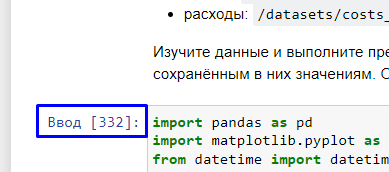 </div>

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице представлена информация о регионах, устройствах и каналах привлечения пользователей. В последних двух столбцах (необходимо преобразовать в формат дата и время) содержится информация об их сессиях. Удалим дубликаты и преобразуем названия столбцов в удобный вид.

In [3]:
visits.drop_duplicates()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


Явных дубликатов не обнаружено, поэтому количество записей осталось прежним.

In [4]:
visits.columns = [col.lower().replace(' ', '_') for col in list(visits.columns)]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наилучишй способ замены названий столбцов без явного упоминания наименований, молодец!

Теперь преобразуем тип данных последних двух столбцов.

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
У `read_csv` есть параметр, который позволяет даты сразу в нужный формат переводить, рекомендую к использованию  </div>

Проведем аналогичные процедуры с другими таблицами: заказы и расходы.

In [6]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
orders.drop_duplicates()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [8]:
orders.columns = [col.lower().replace(' ', '_') for col in list(orders.columns)]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [9]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['event_dt']

0       2019-05-01 23:09:52
1       2019-05-01 12:24:04
2       2019-05-01 11:34:04
3       2019-05-01 15:34:40
4       2019-05-01 13:59:51
                ...        
40207   2019-10-31 16:19:07
40208   2019-10-31 01:17:17
40209   2019-10-31 06:17:29
40210   2019-10-31 22:46:19
40211   2019-10-31 13:29:06
Name: event_dt, Length: 40212, dtype: datetime64[ns]

In [10]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
costs.drop_duplicates()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [12]:
costs.columns = [col.lower().replace(' ', '_') for col in list(costs.columns)]
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [13]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты для каждого датафрейма пишешь очень схожие куски кода, но можно ведь сделать функцию для первичного анализа датафреймов. Смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить. Переносить функцию из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования. Получая зелёные комментарии от ревьюеров.)
    
</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [14]:
# функция для создания профилей пользователей
#def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        # проверяем, встречается ли каждый пользователь
    #        # среди тех, кто совершил событие event
    #        profiles[event] = profiles['user_id'].isin(
     #           events.query('event_name == @event')['user_id'].unique()
      #      )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
       profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'unique_users'}).reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
       ad_costs[['dt', 'channel', 'acquisition_cost']],
      on=['dt', 'channel'],
     how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # возвращаем профили с CAC

In [15]:
# функция для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [16]:
# функция для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для сглаживания
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

# plot_retention(retention, retention_history, 7)

In [20]:
# функция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


# plot_conversion(conversion, conversion_history, 7)

In [21]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

Составим профили пользователей.


In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Выясним минимульную и максимальную дата привлечения.

In [23]:
print('Минимальная дата привлечения:', profiles['first_ts'].min())
print('Максимальная дата привлечения:', profiles['first_ts'].max())

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что проверили корректность временного интервала. Соответствует ли этот период указанному в задании? Хотелось бы в проекте видеть акцент на этом моменте. 


Самая ранняя дата привелчения пользователя 1 мая 2019 года, а самая поздняя 27 октября 2019 года. Таким образом, в нашем распоряжении клиенты, привлеченные за почти 6 месяцев 2019 года.

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [24]:
print(profiles['region'].value_counts())

United States    100002
UK                17575
France            17450
Germany           14981
Name: region, dtype: int64


Больше всего пользователей из США, затем из Великобритании, Франции и Германии.

In [25]:
profiles.pivot_table(
    index='region',
    values='payer',
    aggfunc='mean'
).sort_values(by='payer', ascending=False)

,payer
region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Eсть любопытный способ, который позволяет облагородить вывод в частности и дробей - `style.format`, начать читать про него можно [тут](https://habr.com/ru/post/521894/)


</div>

Наибольшее число платящих пользователей приходится на США - около 7%.

#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [26]:
print(profiles['device'].value_counts())

iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: device, dtype: int64


Самым популярным устройством среди пользователей явялется iPhone, затем устройства на базе Android.

In [27]:
profiles.pivot_table(
    index='device',
    values='payer',
    aggfunc='mean'
).sort_values(by='payer', ascending=False)

,payer
device,
Mac,0.063644
iPhone,0.062079
Android,0.058518
PC,0.050468


Больше всего платят владельцы устройств Мак - 6%.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [28]:
print(profiles['channel'].value_counts())

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64


Больше всего пользователей приходит из органического трафика, затем идёт FaceBoom и TipTop.

In [29]:
profiles.pivot_table(
    index='channel',
    values='payer',
    aggfunc='mean'
).sort_values(by='payer', ascending=False)

,payer
channel,
FaceBoom,0.122049
AdNonSense,0.113402
lambdaMediaAds,0.104700
TipTop,0.096007
RocketSuperAds,0.079137
WahooNetBanner,0.052964
YRabbit,0.038265
MediaTornado,0.035747
LeapBob,0.030633


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От органики так мало платящих, так как зачастую закупочные каналы оптимизируются с целью приведения максимально платящей аудитории, а органические пользователи случаются разные</div>

Наибольшая доля платящих пользователей приходится на трафик по каналу FaceBoom, затем AdNonSense и IambdaMediaAds.

#### Общий вывод

Больше всего клиентов приходится на США. Кроме этого, именно в этой стране доля платящих пользователей является наибольшей. Среди устройств на первом месте iPhone, а вот платящих пользователей, пользующихся этим устройством, меньше, чем среди тех, кто использует Mac. Но отличие среди них не очень большое, около 0.1%. Стоит отметить, что самым распространённым каналом трафика является органический трафик, то есть пользователи самостоятельно заходят на сервис, но наибольшее количество платящих пользователей приходится на другие каналы: FaceBoom, AdNonSense и IambdaMediaAds.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг.

Чтобы вычислить эту информацию суммируем столбец `costs` в датасете `costs`.

In [30]:
total_costs = costs['costs'].sum()
print(f'{total_costs:.2f}')

105497.30


Общие рекламные расходы составляют 105497 долларов (скорее всего рассчёты в долларах, так как в датасете представлены зарубежные страны).

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Чтобы выяснить расходы по каждому рекламному источнику, построим сводную таблицу с этой информацией.

In [31]:
costs.pivot_table(
    index='channel',
    values='costs',
    aggfunc='sum'
).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего было вложено в рекламные источники TipTop, FaceBoom и WahooNetBanner. Учитывая информацию о платящих пользователях, привлеченных по каждому из источников трафика, можно отметить, что есть пересечение по одной из позиций в тройке лидеров - FaceBoom. Возможно, данный канал привлечения клиентов окажется самым эффективным, но эту информацию ещё предстоит выяснить.

#### Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

In [32]:
costs['week'] = (pd.to_datetime(costs['dt']) - pd.to_datetime(costs['dt']).min()).dt.days // 7
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,0,5
1,2019-05-02,FaceBoom,78.1,0,5
2,2019-05-03,FaceBoom,85.8,0,5
3,2019-05-04,FaceBoom,136.4,0,5
4,2019-05-05,FaceBoom,122.1,0,5


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу на одном графике отобразить все каналы, так их будет проще сравнить друг с другом
</div>

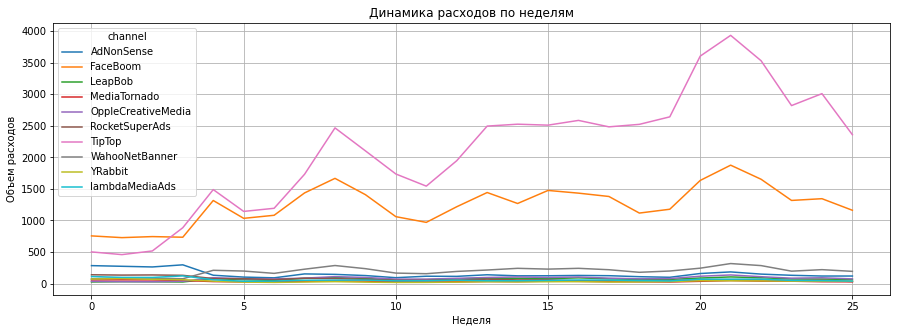

In [33]:
costs_by_week = costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
)

# plt.figure(figsize=(15, 5))
costs_by_week.plot(grid=True, figsize=(15, 5))
plt.xlabel('Неделя')
plt.ylabel('Объем расходов')
plt.title('Динамика расходов по неделям')
plt.show()

Самые большие расходы пришлись на канал TipTop и FaceBoom. Вложения в них были практически пропорциональными, но видно как резко изменились вложения в TipTop после 3-й недели.

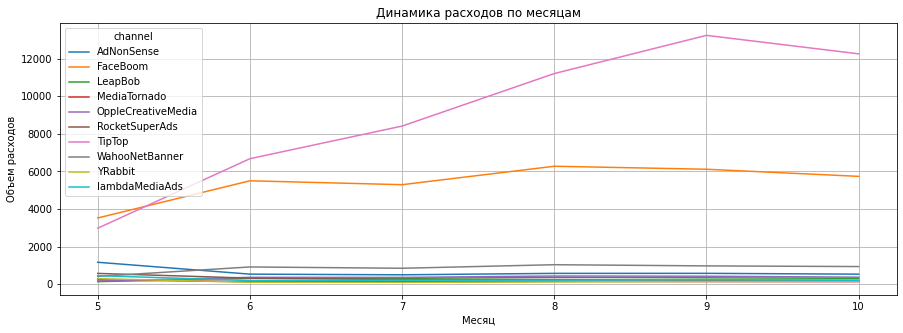

In [34]:
costs_by_month = costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
)

costs_by_month.plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц')
plt.ylabel('Объем расходов')
plt.title('Динамика расходов по месяцам')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Отлично
</div>

В другие каналы трафика вложения практически не изменялись ни в разрезе месяцев, ни в разрезе недель.

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [35]:
cac = profiles.pivot_table(
    index='channel',
    values='acquisition_cost',
    aggfunc='mean'
).rename(columns={'acquisition_cost': 'cac'})
cac.sort_values(by='cac', ascending=False)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самым дорогим по средней стоимости привлечения одного пользователя (САС) из каждого источника является TipTop. Для привлечения одного пользователя пришлось потратить в среднем 2.78 доллара, что в 2.5 раза больше, чем средняя стоимость привлечения пользователя из следующего источника FaceBoom.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

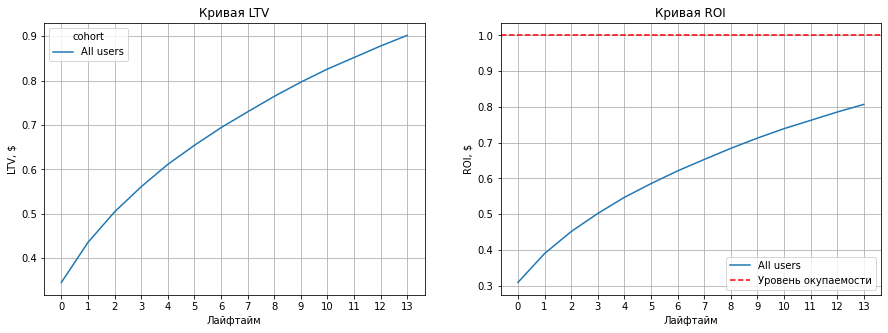

In [36]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, datetime(2019, 11, 1).date(), 14
)

plt.figure(figsize=(15, 5))

report = ltv.drop(columns=['cohort_size'])

ax1 = plt.subplot(1, 2, 1)
report.T.plot(grid=True, xticks=list(report.columns.values), ax=ax1)
plt.title('Кривая LTV')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')


report = roi.drop(columns=['cohort_size', 'cac'])
ax2 = plt.subplot(1, 2, 2)
report.T.plot(grid=True, xticks=list(report.columns.values), ax=ax2)
plt.title('Кривая ROI')
plt.ylabel('ROI, $')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()

plt.show() 

Двухнедельный LTV составляет 90 центов. При этом по графику возрата инвестиций, мы видим, что за две недели затраты на инвестиции не окупаются.


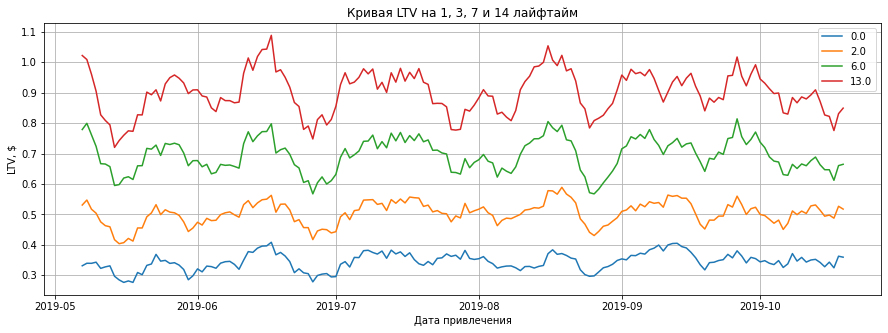

In [37]:
window = 7
report = ltv_history[[0, 2, 6, 13]]

filtered_data = report.copy()
for column in report.columns.values:
    filtered_data[column] = filtered_data[column].rolling(window).mean()

filtered_data.plot(grid=True, figsize=(15, 5))
plt.title('Кривая LTV на 1, 3, 7 и 14 лайфтайм')
plt.ylabel('LTV, $')
plt.xlabel('Дата привлечения')
plt.legend()
plt.show()

На графике мы видим, что LTV по каждому из лайфтаймов достигал своего пика в середине июня и августа. При этом можно заметить несколько приблежний графиков между собой. Например, в середине мая LTV на 14 дней был очень близко к LTV на 7 день, то есть клиенты привлеченные в середине мая активно пользовались сервисом в течение 7 дней, а затем часть из них сократила потребление услуги. То же самое мы видим под конец августа, когда клиенты спустя 3 дня пользования сервисом остыли к нему на 7 день.

Лайфтаймы последнего дня наблюдения ниже, чем начальные, что говорит о том, что клиенты привлеченные в конце октября пользуются сервисом ещё меньше, чем клиенты привлеченные в начале наблюдения. Возможно, компания делает что-то не так в работе по привлечению клиентов. И они уходят от пользования сервисом и продления оплат.

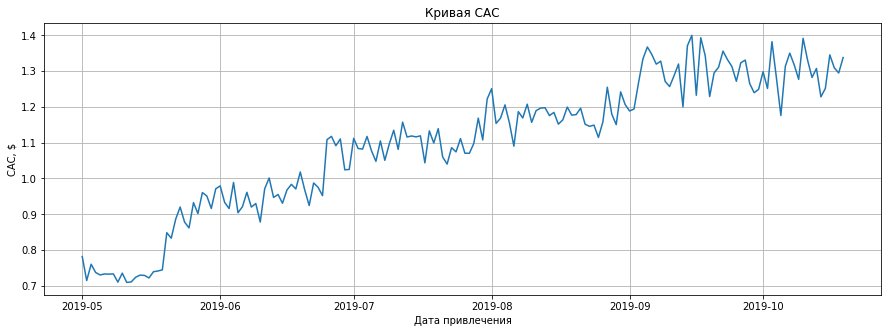

In [38]:
plt.figure(figsize=(15, 5))

roi_history['cac'].plot(grid=True)
plt.title('Кривая САС')
plt.ylabel('СAC, $')
plt.xlabel('Дата привлечения')
plt.show()

Расходы на привлечение клиентов росли на протяжении всего периода наблюдения. Учитывая то, как снижался LTV к концу периода исследования, можно предположить, что ROI будет снижаться.

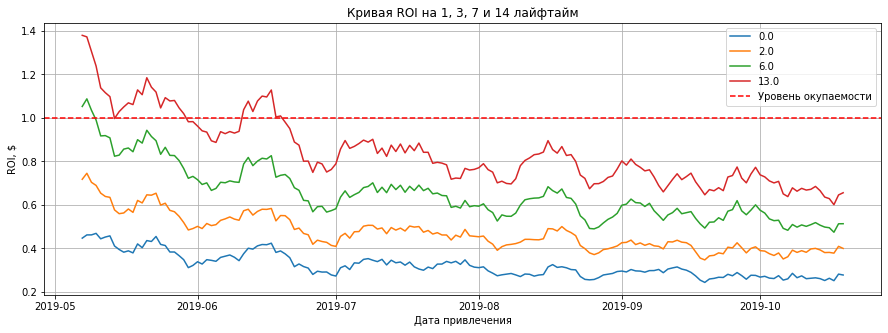

In [39]:
window = 7
report = roi_history[[0, 2, 6, 13]]

filtered_data = report.copy()
for column in report.columns.values:
    filtered_data[column] = filtered_data[column].rolling(window).mean()

filtered_data.plot(grid=True, figsize=(15, 5))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.title('Кривая ROI на 1, 3, 7 и 14 лайфтайм')
plt.ylabel('ROI, $')
plt.xlabel('Дата привлечения')
plt.legend()
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Нет проблем в том, чтобы самостоятельно строить графики, но было бы славно их сгруппировать рядом друг с другом, чтобы удобнее анализировать эффективность привлечения
</div>

Мы видим, что окупаемость в конце периода исследования ниже, чем в начале. При этом происходит это по всем лайфтаймам. Очевидно, что в начале периода исследования окупаемость была выше, чем в конце. Клиенты с лайфтаймом меньше 2 недель не окупаются весь период наблюдения, а вот с лайфтаймом 14 дней окупались в самом начале, когда и расходы на рекламу были ещё невысокими.

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

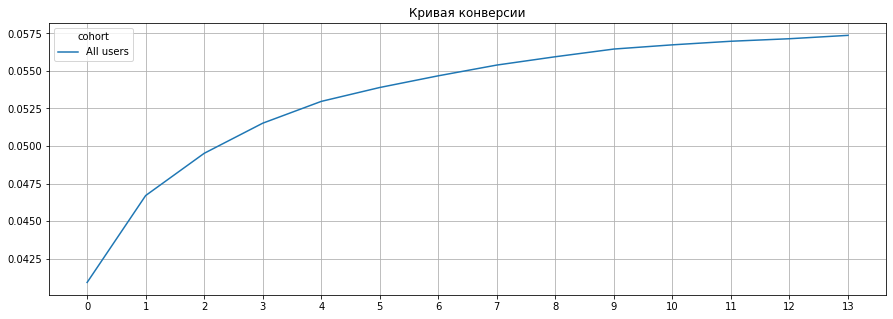

In [40]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.title('Кривая конверсии')
plt.show() 

Из графика Кривой конверсии мы видим, что её динамика не является очень высокой. За 14 дней пользования сервисом конверсия возрастает на почти 2%, с 4,2% до 5.7%. 

Выясним какие кагорты показали самые высокие конверсии.

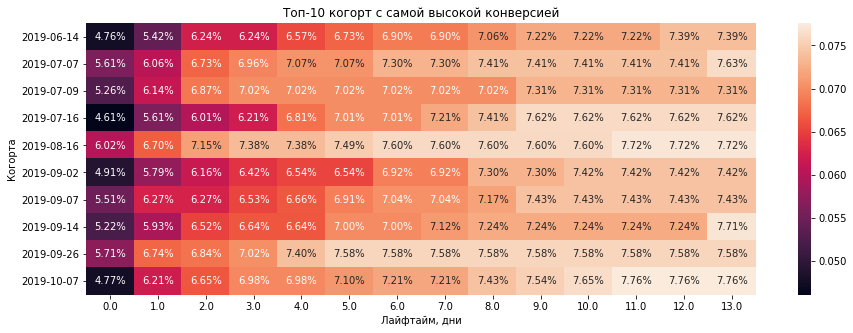

In [41]:
report = (conversion_history
          .sort_values(by=13, ascending=False)[:10]
          .drop(columns=['cohort_size'])
).sort_values(by='dt')
plt.figure(figsize=(15, 5))
sns.heatmap(report, annot=True, fmt='.2%')
plt.ylabel('Когорта')
plt.xlabel('Лайфтайм, дни')
plt.title('Топ-10 когорт с самой высокой конверсией')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Тепловая карта - отличная визуализация, но рекомендую добавлять `linewidth`, этот параметр отвечает за ширину линии разделителя между ячейками, что делает график чуть более читаемым.


В топ-10 попали 4 когорты в сентябре, и 3 в июле. Особо стоит отметить 7 октября, когда конверсия на 1 день была 4.77%, а через 2 недели выросла до 7.76%. Это самая большая динамика результатов.

In [42]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14
)

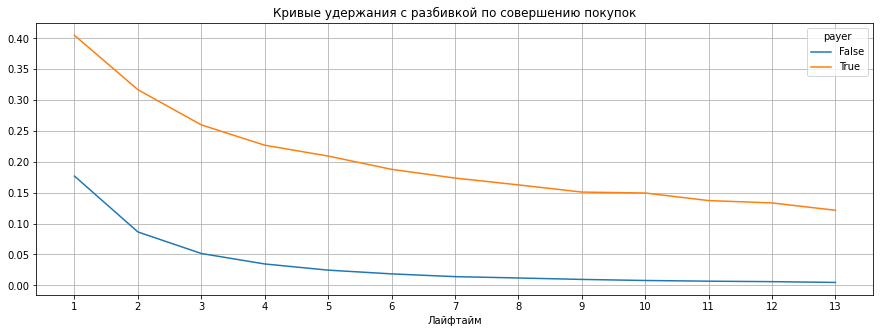

In [43]:
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show() 


По кривым удержания мы видим, что платящие пользователи теряются быстрее, чем платящие. С 0.40 показатель падает до 0.13. В то же время среди неплатящих пользователей перестают импользоваться где-то на 10 день.

Посмотрим, какая когорта лучше всего удерживалась.

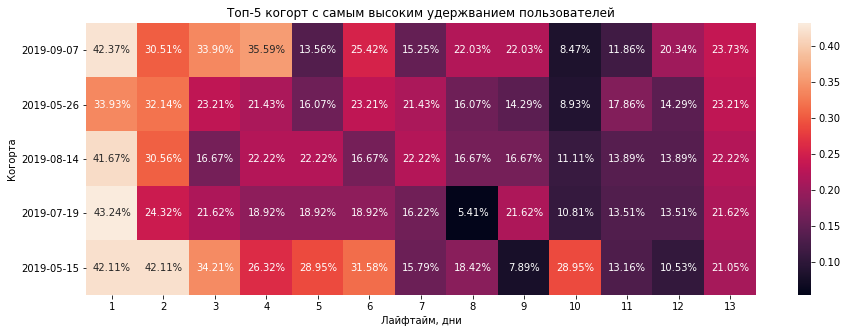

In [44]:
report = (retention_history
 .query('payer == True')
 .drop(columns=['cohort_size', 0])
 .droplevel('payer')
).sort_values(by=13, ascending=False)[:5]

report.index = pd.to_datetime(report.index).date

plt.figure(figsize=(15,5))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%'
)
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Когорта')
plt.title('Топ-5 когорт с самым высоким удержванием пользователей')
plt.show()


Самое высокое удержвание пользователей приходится на когорту от 9 июля, на втором месте 26 мая. Когорта от 9 июля ещё и с точки зрения конверсии попала в топ-10. При этом самое лучшее удержание в динамике показала когорта от 26 мая, которая с 34% упала лишь до 23%.



##### Конверсия и удержание по странам

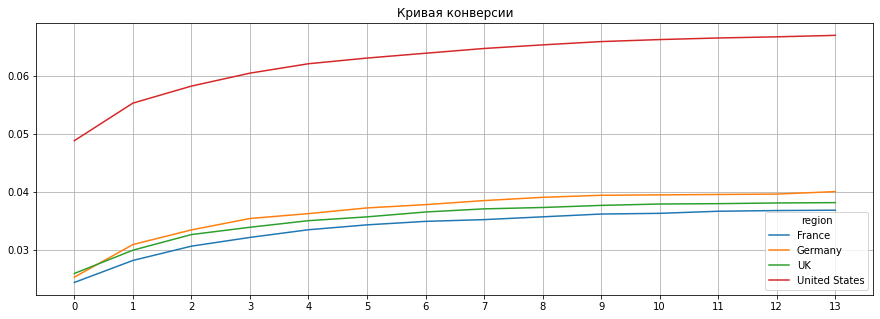

In [45]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.title('Кривая конверсии')
plt.show() 

Самая высокая конверсия в США. Она в 2 раза больше, чем по остальным странам.

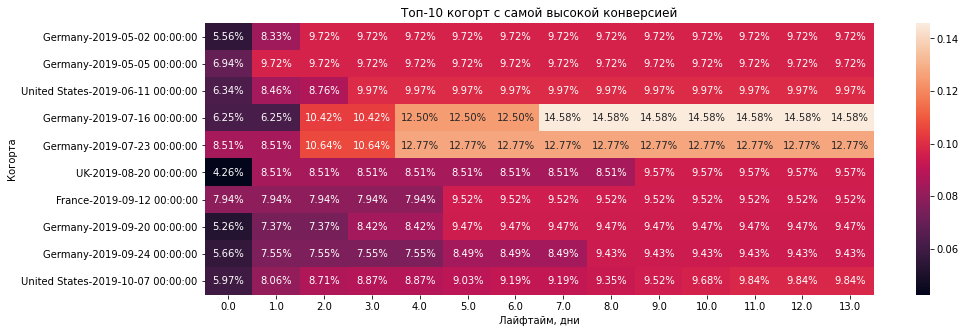

In [46]:
report = (conversion_history
          .sort_values(by=13, ascending=False)[:10]
          .drop(columns=['cohort_size'])
).sort_values(by='dt')
plt.figure(figsize=(15, 5))
sns.heatmap(report, annot=True, fmt='.2%')
plt.ylabel('Когорта')
plt.xlabel('Лайфтайм, дни')
plt.title('Топ-10 когорт с самой высокой конверсией')
plt.show()

Легко заметить, что среди когорт по странам самая высокая конверсия в Германии с датой от 16 июля, а на втором месте когорта от 23 июля. Хотя среди остальных когорт конверсия находится на уровне между 9 и 10 процентами

In [47]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

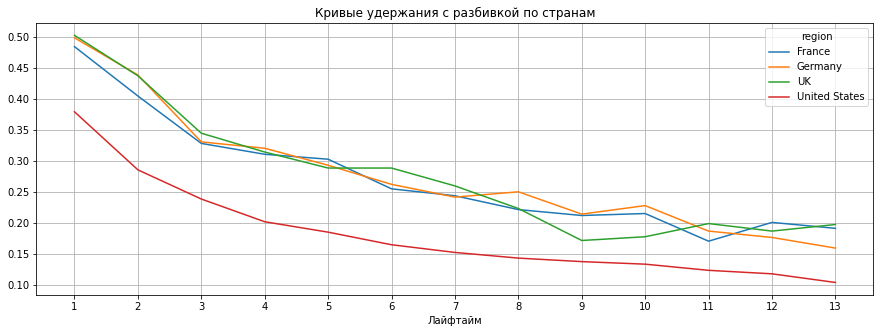

In [48]:
report = retention.drop(columns=['cohort_size', 0]).query('payer == True').droplevel('payer')
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по странам')
plt.show() 


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

Кривая удержания во всех старанх кроме США находится на более высоком уровне, а к концу 2 недель они в 3 раза меньше по всем странам, а по США в 4 раза.

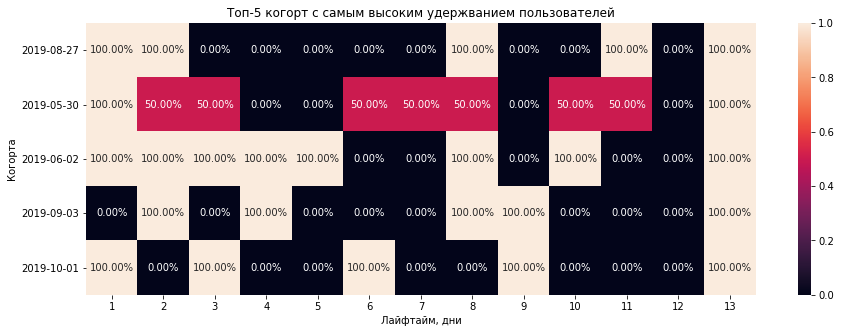

In [49]:
report = (retention_history
 .query('payer == True')
 .drop(columns=['cohort_size', 0])
 .droplevel(['payer', 'region'])
).sort_values(by=13, ascending=False)[:5]

report.index = pd.to_datetime(report.index).date

plt.figure(figsize=(15,5))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%'
)
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Когорта')
plt.title('Топ-5 когорт с самым высоким удержванием пользователей')
plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Тепловая карта - отличная визуализация, но рекомендую добавлять `linewidth`, этот параметр отвечает за ширину линии разделителя между ячейками, что делает график чуть более читаемым.


По тепловой карте видно, что 100% удержание встречается часто, но так как, видимо, данных не очень много, и по сути удержанием является оплата сервиса, то почти в каждый день лайфатайма происходит какая-то покупка.

##### Конверсия и удержание по устройствам

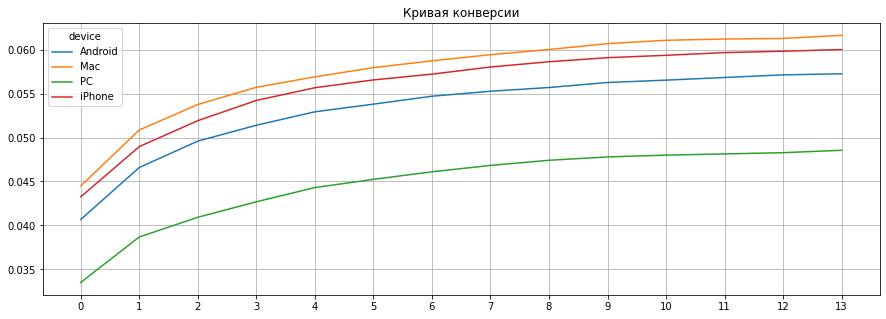

In [50]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.title('Кривая конверсии')
plt.show() 

По дейвам мы видим самую высокую конверсию среди устройств на основе iOs, то есть маки и айфоны. Можно предположить, что платформа заказчика лучше всего приспособлена для данных устройств.

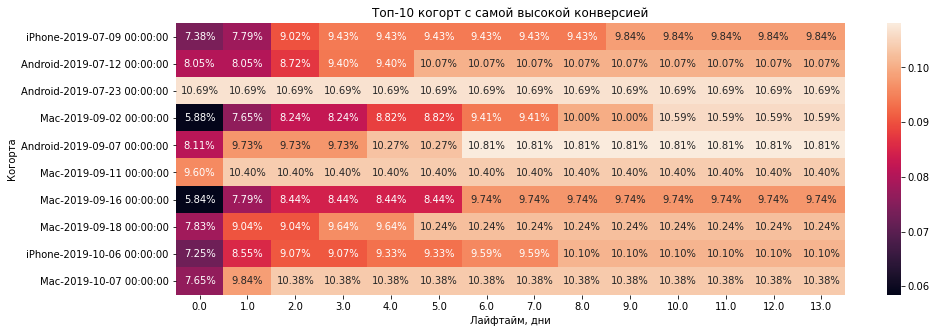

In [51]:
report = (conversion_history
          .sort_values(by=13, ascending=False)[:10]
          .drop(columns=['cohort_size'])
).sort_values(by='dt')
plt.figure(figsize=(15, 5))
sns.heatmap(report, annot=True, fmt='.2%')
plt.ylabel('Когорта')
plt.xlabel('Лайфтайм, дни')
plt.title('Топ-10 когорт с самой высокой конверсией')
plt.show()

Вывод про устройства, сделанный ранее подтверждается тем, какие когорты показали самую высокую конверсию. Стоит отметить, что в топ-5 при этом попали три когорты, использующие Android.

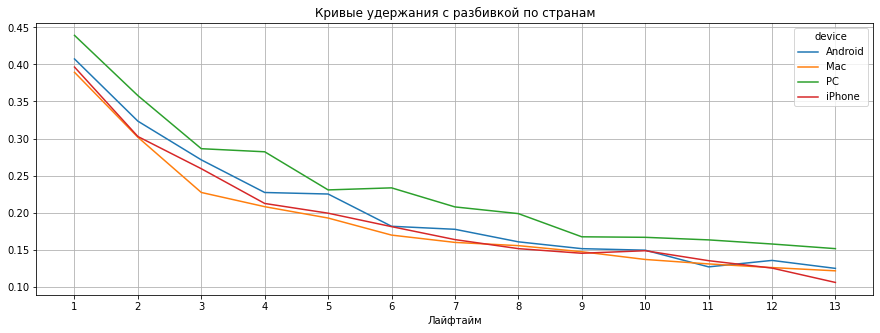

In [52]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

report = retention.drop(columns=['cohort_size', 0]).query('payer == True').droplevel('payer')
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по странам')
plt.show() 

А вот насчёт удержания пользователей мы видим, что лидируют пользователи ПК. Возможно, это связано в целом с тем, что пользователи iOS более платёжеспособные, но при этом устройство меньше подходит для работы с платформой, а вот на ПК мы наблюдаем иную картину. Стоит как-то исследовать вопрос глубже, нет ли, например, среди пользователей тех, кто начал использовать платформу на iOS, а потом понял, что с ПК это делать удобнее.

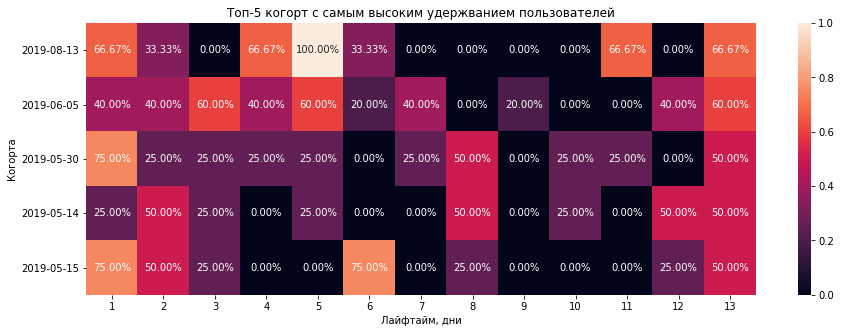

In [53]:
report = (retention_history
 .query('payer == True')
 .drop(columns=['cohort_size', 0])
 .droplevel(['payer', 'device'])
).sort_values(by=13, ascending=False)[:5]

report.index = pd.to_datetime(report.index).date

plt.figure(figsize=(15,5))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%'
)
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Когорта')
plt.title('Топ-5 когорт с самым высоким удержванием пользователей')
plt.show()


В топ пять по удержанию попали когорты конца весны и начала лета. Выделяется августовская когорта, показавшая наилучшие результаты. Я бы связал такой результат с тем, что в августе завершается период активных отпусков, и компании могут запускать новые проекты, поэтому начинают использовать платформу в своей работе.

##### Конверсия и удержание по каналам

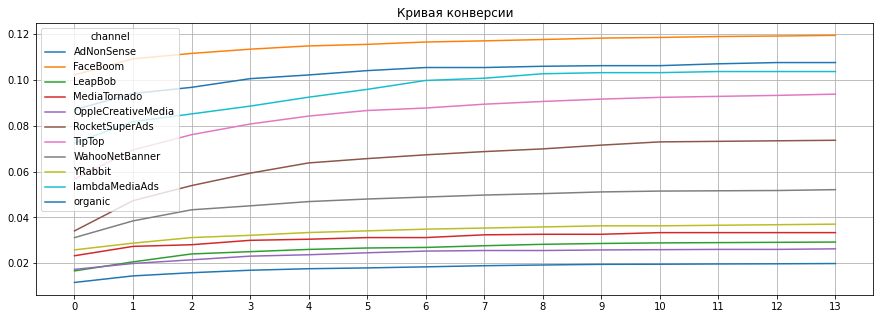

In [54]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.title('Кривая конверсии')
plt.show() 

Лучшую конверсию показывают каналы - FaceBoom и AdNonSense. Одну из лучших динами роста показали каналы lambdaMediaAds, RockerSuperAds и TipTop. 

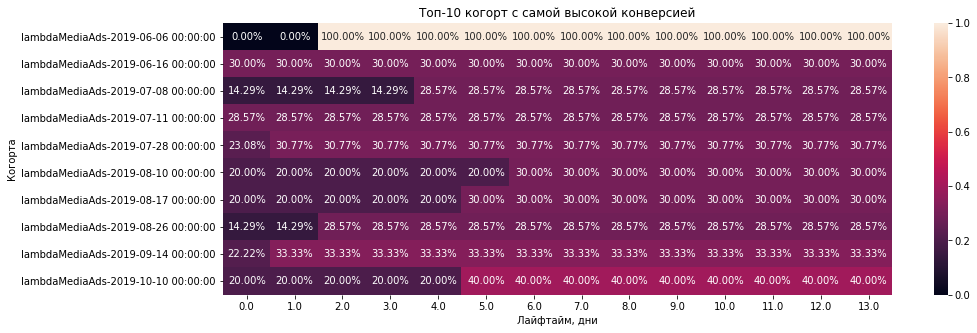

In [55]:
report = (conversion_history
          .sort_values(by=13, ascending=False)[:10]
          .drop(columns=['cohort_size'])
).sort_values(by='dt')
plt.figure(figsize=(15, 5))
sns.heatmap(report, annot=True, fmt='.2%')
plt.ylabel('Когорта')
plt.xlabel('Лайфтайм, дни')
plt.title('Топ-10 когорт с самой высокой конверсией')
plt.show()

Среди когорт полностью топ образован каналом lambdaMediaAds, который показал одну из лучших динамик. Самый успешный запуск приходится на 6 июня 2019 года, и затем все лето и осень данный канал давал наибольшую конверсию.

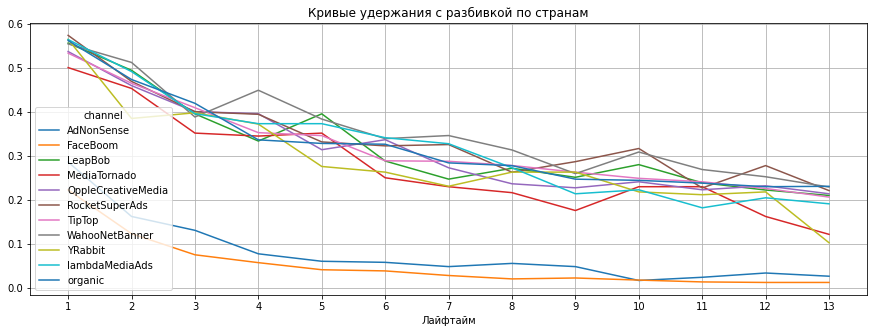

In [56]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

report = retention.drop(columns=['cohort_size', 0]).query('payer == True').droplevel('payer')
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по странам')
plt.show() 

Каналы, которую показывали наилучшую конверсию при этом показывают наихудшее удержание. То есть пользователи покупали услуги сервиса, а затем прекращали им пользоваться. Речь про FaceBoom. Канал lambdaMediaAds - лидер по когортам по конкервсии, показывает средние результаты удержания. А лучшее удержание у канала organic по итогам лайфтайма в 14 дней. Скорее всего пользователи из органического трафика специально находили платформу для своего пользования.

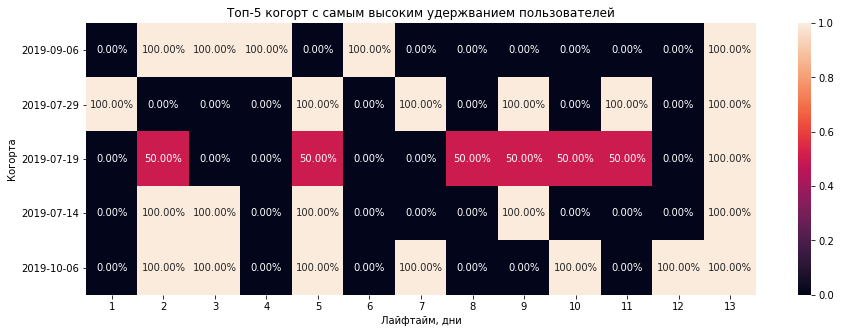

In [57]:
report = (retention_history
 .query('payer == True')
 .drop(columns=['cohort_size', 0])
 .droplevel(['payer', 'channel'])
).sort_values(by=13, ascending=False)[:5]

report.index = pd.to_datetime(report.index).date

plt.figure(figsize=(15,5))
sns.heatmap(
    report,
    annot=True,
    fmt='.2%'
)
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Когорта')
plt.title('Топ-5 когорт с самым высоким удержванием пользователей')
plt.show()


По удержанию пользователей самым успешным можно назвать месяц июль, три когорты которого попали в топ-5.

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI

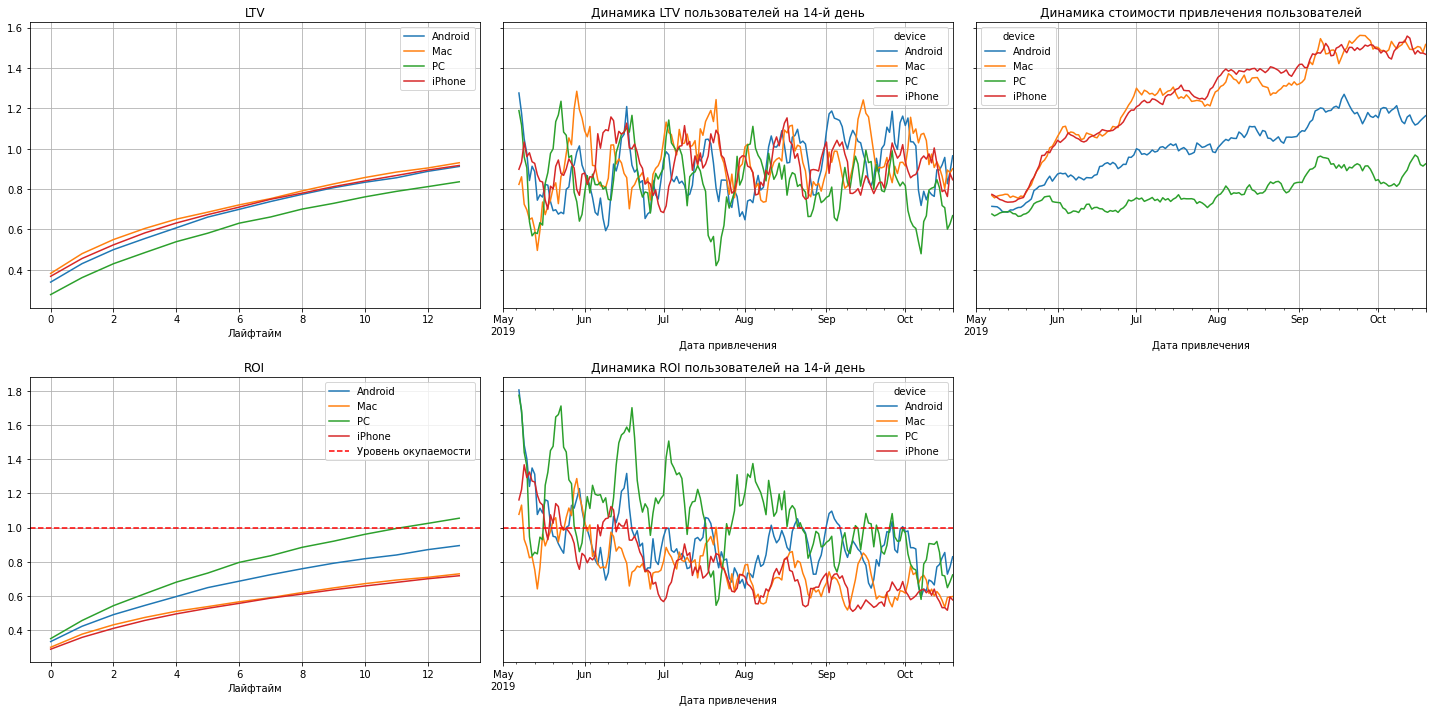

In [58]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. Опять же рекомендую здесь тоже использовать маркированный список).
    
* Вот эта функция компактнее выводит набор метрик для оценки эффективности, так попроще считывать информацию
</div>

LTV пользователей на мобильных устройствах и Mac выше, чем среди пользоваталей PC. Однако стоит отметить, что стоимость привлечения пользователей на PC и Android меньше, чем среди остальных. Если взглянуть на ROI, то единственные пользователи, чей ROI больше 1 - это пользователи PC, которые больше 11 дней пользовались сервисом. Динамика ROI говорит о том, что в начале исследования ROI почти всех пользователей была выше 1, но затем только пользователи PC показывают хорошие показатели. При этом общая тенденция такова, что к концу периода наблюдений ROI снижается независимо от типа устройства, который используют пользователи.

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

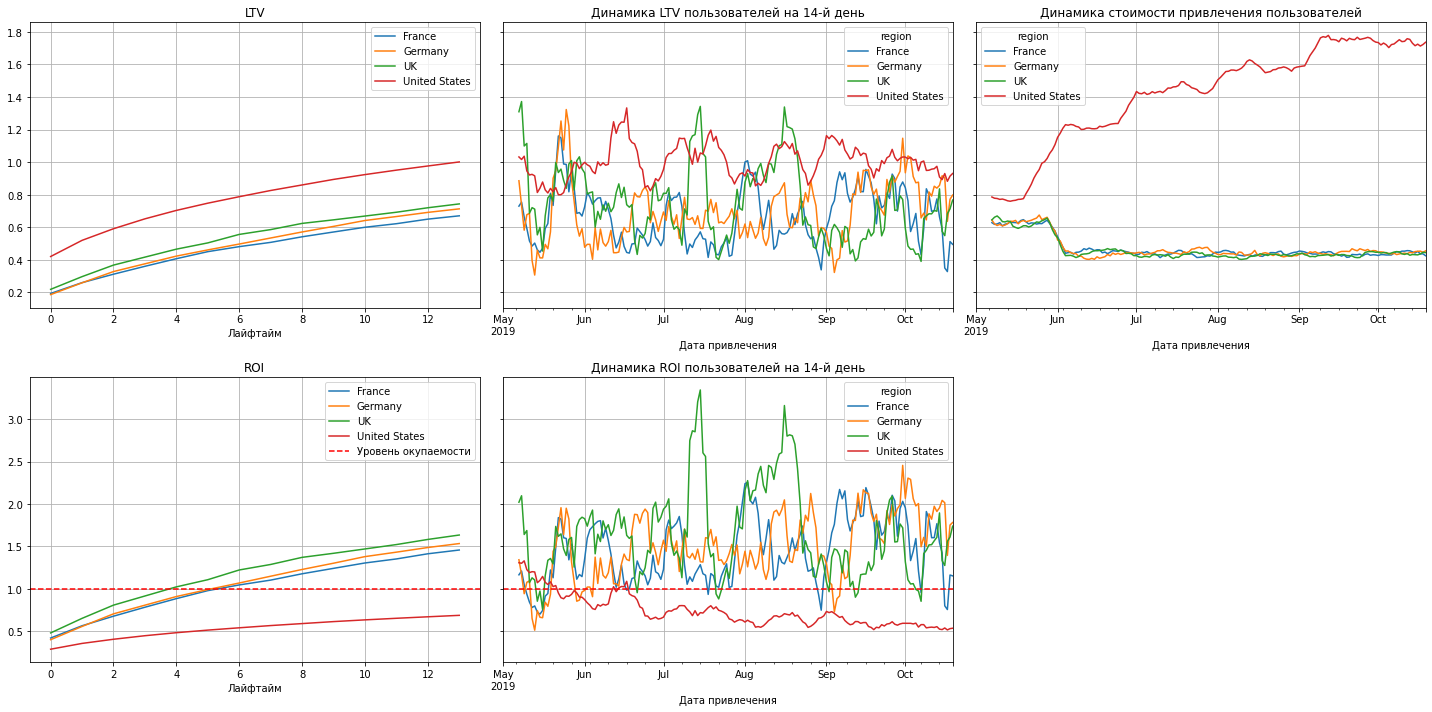

In [59]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить внимание на сходство стоимости привлечения `US` и `Tip Top` это неспроста)

Анализируя данные по странам можно заметить следующее:
1. LTV в США выше, чем в других странах. Стоит отметить, что и количество пользователей из США больше всего.
2. На 14-й день LTV из Великобритании было выше в середине июля и августа. А в конце июня LTV всех стране было выше, чем в США.
3. Затраты привлечение пользователей из США росли начиная с июля, а по остальным странам сокращались.
4. На 6 день лайфтайма стали окупаться пользователи из всех стран кроме США. США так и не окупились.
5. Динамика ROI на протяжении всего периода по всем странам был выше 1, кроме США.

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

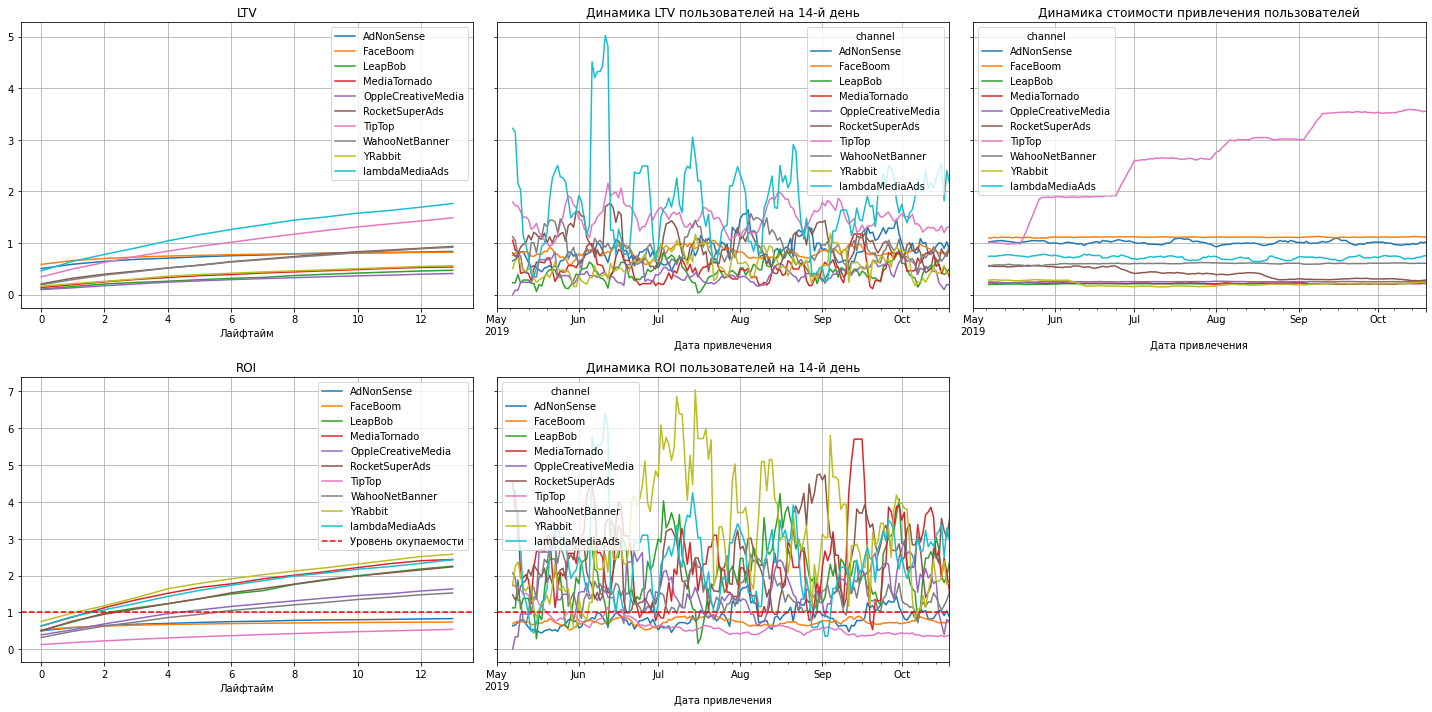

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё рассчитать конверсию и удержание по каналам, странам, устройствам, это дополнительная детализация позволит выявить проблемы окупаемости. И дополнит выводы, после чего я докомментирую работу
</div>

С точки зрения каналов привлечения пользователей можно отметить следующие факты:
1. Самый высокий LTV показали пользователи, привлеченные по каналам IambdaMediaAds и TipTop.
2. На 14-й день LTV лучше всего у канала привлечения IambdaMediaAds и TipTop.
3. Самые крупные расходы на привлчение пользователей пришлись на канал TipTop.
4. Канал TipTop при этом показал самую низкую окупаемость. Кроме этого не окупились каналы AdNonSense и FaceBoom.
5. Вывод из пункта 4. подтверждается и по динамике ROI на 14-й день. Правда, появляются неодиданные лидеры в виде YRabbit и MediaTornado.



#### Ответы на важные вопросы:
* Окупается ли реклама, направленная на привлечение пользователей в целом?
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

##### Окупается ли реклама, направленная на привлечение пользователей в целом?

Нет, не окупается. Общий ROI не превысил 1 ни разу. При этом компания вкладывается в рекламу все больше и больше. Ещё с июля пытается привлечь больше пользователей из США, при этом используя мало эффективный канал продвижения - TipTop.

##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Самыми негативными устройствами являются iPhone и Mac. Возможно приложение плохо работает на устройствах с операционными системами iOS. При этом стоит отметть, что на ПК приложение работает лучшее и пользуется большей популярностью.

По странам самыми сложными для привлечения оказались клиенты из США, а каналом привлечения TipTop. Возможно, среди пользователей в этой стране через канал TipTop реклама показывается не самой платежеспособной аудитории, а клиенты из США не так активно заинтересованы в развлекательном приложении, так как известно, что рынок развлечения США очень крупные и богатый на разные компании.

##### Чем могут быть вызваны проблемы окупаемости?
Возможно, необходимо было провести анализ гораздо раньше и точнее исследовать рынок США прежде, чем выходить на него. Кроме этого, стоит уточнить целевую аудиторию данного приложения. Насколько она является платежеспособной, а также какими каналами привлечения её можно достать.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
Неэффективность привлечения пользователей, возможно, связана с тем, что маркетологи неправильно опредили аудиторию, на которую стоит направить рекламную кампанию. Большие средства расходовались на дорогие и неэффективные каналы трафика.

- Сформулируйте рекомендации для отдела маркетинга.
В качестве рекомендации можно предложить оформить дашборд в самом начале рекламной кампании, чтобы оперативно отслеживать эффективность работы. Тогда будет понятнее, какими устройствами пользуются клиенты, из каких они стран и какой канал трафика для них наиболее предпочтительный. Также следует внимательнее изучить ауд

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, все критические замечания исправлены, принимаю проект, ты молодец). Касательно рекомендаций, не хватает связи каналов и стран, ведь пользователь пришедший из `US` пришел с какого-то канала, вот этот кусочек пазла позволит получить общую картину. Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) 
    
       
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, желаю удачи!) 
    
</div>